#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [68]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.metrics import Accuracy

import numpy as np
np.random.seed(10)

# 資料準備

In [69]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [70]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [71]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [72]:
y_label_train_OneHot = utils.to_categorical(y_label_train)
y_label_test_OneHot = utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [26]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [29]:
import copy
model1, model2, model3 = copy.copy(model), copy.copy(model), copy.copy(model)
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

result1 = model1.fit(x_img_train, y_label_train_OneHot, batch_size=32, epochs=5, workers=4, validation_split=0.2)
print("==========")
result2 = model2.fit(x_img_train, y_label_train_OneHot, batch_size=32, epochs=5, workers=4, validation_split=0.2)
print("==========")
result3 = model3.fit(x_img_train, y_label_train_OneHot, batch_size=32, epochs=5, workers=4, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 19s 465us/step - loss: 24939672949244.2578 - accuracy: 0.0984 - val_loss: 74.1919 - val_accuracy: 0.0952
Epoch 2/5
40000/40000 [==============================] - 18s 462us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 74.1919 - val_accuracy: 0.0952
Epoch 3/5
40000/40000 [==============================] - 19s 467us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 74.1918 - val_accuracy: 0.0952
Epoch 4/5
40000/40000 [==============================] - 18s 462us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 74.1919 - val_accuracy: 0.0952
Epoch 5/5
40000/40000 [==============================] - 19s 464us/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 74.1918 - val_accuracy: 0.0952
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 20s 508us/step - loss: 0.1799 - accuracy: 0.1004 - val_loss: 0.1804 - val_accuracy: 0

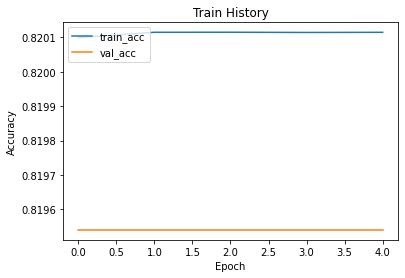

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

train_history = result3

#定義一個繪圖函數
def show_train_history(train_acc,val_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history("accuracy", "val_accuracy")